# Experimental Notebook

In [11]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
import multiprocessing

try:
    os.mkdir('output/stitcher')
except:
    pass

In [12]:
available_ts = []
available_ts_cnt = []
available_data = os.listdir('/media/gabriel/DATA/23/')

for i in available_data:
    if i[11:19] not in available_ts:
        available_ts.append(i[11:19])
        available_ts_cnt.append(1)
    else:
        available_ts_cnt[available_ts.index(i[11:19])] += 1

In [13]:
def rotate_image(image, angle):
    image = np.pad(image, ((100,100),(100,100),(0,0)), 'constant', constant_values=0)
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    horizontal_filter = np.logical_not(np.all(result[:, :, 0] == 0, axis = 0))
    vertical_filter = np.logical_not(np.all(result[:, :, 0] == 0, axis = 1))
    return result[vertical_filter][:, horizontal_filter]

def expand(selection, radius):
    cop = np.copy(selection)
    for x in range(-radius,radius+1):
        for y in range(-radius,radius+1):
            if (y==0 and x==0) or (x**2 + y**2 > radius **2):
                continue
            shift = np.roll(np.roll(selection, y, axis = 0), x, axis = 1)
            cop += shift
    return cop

def stitch_videos(t):
    global available_ts
    print(f'Getting Videos for Time {available_ts[t]}\n')
    
    vidcaps = []
    video_length = []

    for i in os.listdir('/media/gabriel/DATA/23/'):
        if i[11:19] == available_ts[t]:
            if i[20:25] in ['Cam48', 'Cam49', 'Cam50']:
                vidcaps.append(cv2.VideoCapture(f'/media/gabriel/DATA/23/{i}'))

                video_length.append(vidcaps[-1].get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(f'output/stitcher/{available_ts[t]}_stitched.mp4', fourcc, 30.0, (1920, 1280))

    for vidcap in vidcaps:
        vidcap.set(1,0)
        
    try:
        for i in tqdm.trange(0, int(min(video_length))):
            current_frame = []
            for vidcap in vidcaps:
                __, frame = vidcap.read()
                current_frame.append(frame)

            img0 = current_frame[0].transpose((1,0,2))
            img1 = current_frame[1].transpose((1,0,2))
            img2 = current_frame[2].transpose((1,0,2))   

            canvas = np.zeros((1946, 2869, 3)).astype(np.uint8)

            im2 = cv2.resize(img2, (1055, 1876))
            im2 = rotate_image(im2, -0.51)
            canvas[51:51+im2.shape[0], 0:0+im2.shape[1], :] = im2

            im0 = cv2.resize(img0, (1058, 1881))
            im0 = rotate_image(im0, -0.14)
            canvas[0:0+im0.shape[0], 1805:1805+im0.shape[1], :] = im0

            ff = canvas[26:26+img1.shape[0], 973:973+img1.shape[1], :] == 0
            ff = expand(ff, 2)
            canvas[26:26+img1.shape[0], 973:973+img1.shape[1], :][ff] = img1[ff]

            canvas = canvas[39:-35, 40:-20]
            canvas = cv2.resize(canvas, (1920, 1280))

            out.write(canvas)
    except KeyboardInterrupt:
        print("Stop")
        out.release()
    
    finally:
        out.release()

In [14]:
multiprocessing.Pool(processes = 4).map(stitch_videos, range(14,30))

Getting Videos for Time 08-00-00
Getting Videos for Time 07-00-00
Getting Videos for Time 08-40-00


Getting Videos for Time 09-20-00




[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b4a00] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b4a00] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b4a00] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b4a00] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x38e5640] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x38ea000] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x38ebc00] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x38ede00] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f57500] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f5cd40] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f5ae40] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f5e600] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x

  0%|          | 0/30005 [00:00<?, ?it/s]

  0%|          | 0/30004 [00:00<?, ?it/s]

  0%|          | 0/30004 [00:00<?, ?it/s]

  0%|          | 0/30004 [00:00<?, ?it/s]

Getting Videos for Time 10-00-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b6780] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x426c300] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x384f900] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30002 [00:00<?, ?it/s]

Getting Videos for Time 03-00-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b49c0] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x4597980] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x6c23900] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30004 [00:00<?, ?it/s]

Getting Videos for Time 03-40-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x32d0280] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3b872c0] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x45be040] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30005 [00:00<?, ?it/s]

Getting Videos for Time 04-00-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x4904e40] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x37aa500] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x38c9180] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30004 [00:00<?, ?it/s]

Getting Videos for Time 04-40-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b6780] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x4431f80] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x66a4b40] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30003 [00:00<?, ?it/s]

Getting Videos for Time 05-20-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f5d200] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3eac040] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f0b040] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30004 [00:00<?, ?it/s]

Getting Videos for Time 06-00-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x32d0280] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3e9f800] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x42d3940] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30003 [00:00<?, ?it/s]

Getting Videos for Time 06-40-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a39c0] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x36a8d80] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0xf548540] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30004 [00:00<?, ?it/s]

Getting Videos for Time 07-20-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b6780] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x4c66bc0] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x390e5c0] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30002 [00:00<?, ?it/s]

Getting Videos for Time 07-40-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b49c0] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x4593080] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x44554c0] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30002 [00:00<?, ?it/s]

Getting Videos for Time 08-20-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f96c80] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x35c4ac0] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3915480] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30002 [00:00<?, ?it/s]

Getting Videos for Time 09-00-00



[mov,mp4,m4a,3gp,3g2,mj2 @ 0x32d0280] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x4450a40] wrong sample count
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3f5f280] wrong sample count
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/30001 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'transpose'

In [10]:
frame_no = 10800
current_frame = []
for vidcap in vidcaps:
    vidcap.set(1,frame_no)
    __, frame = vidcap.read()
    current_frame.append(frame)
current_frame = np.ascontiguousarray(current_frame)

(1872, 2809, 3)


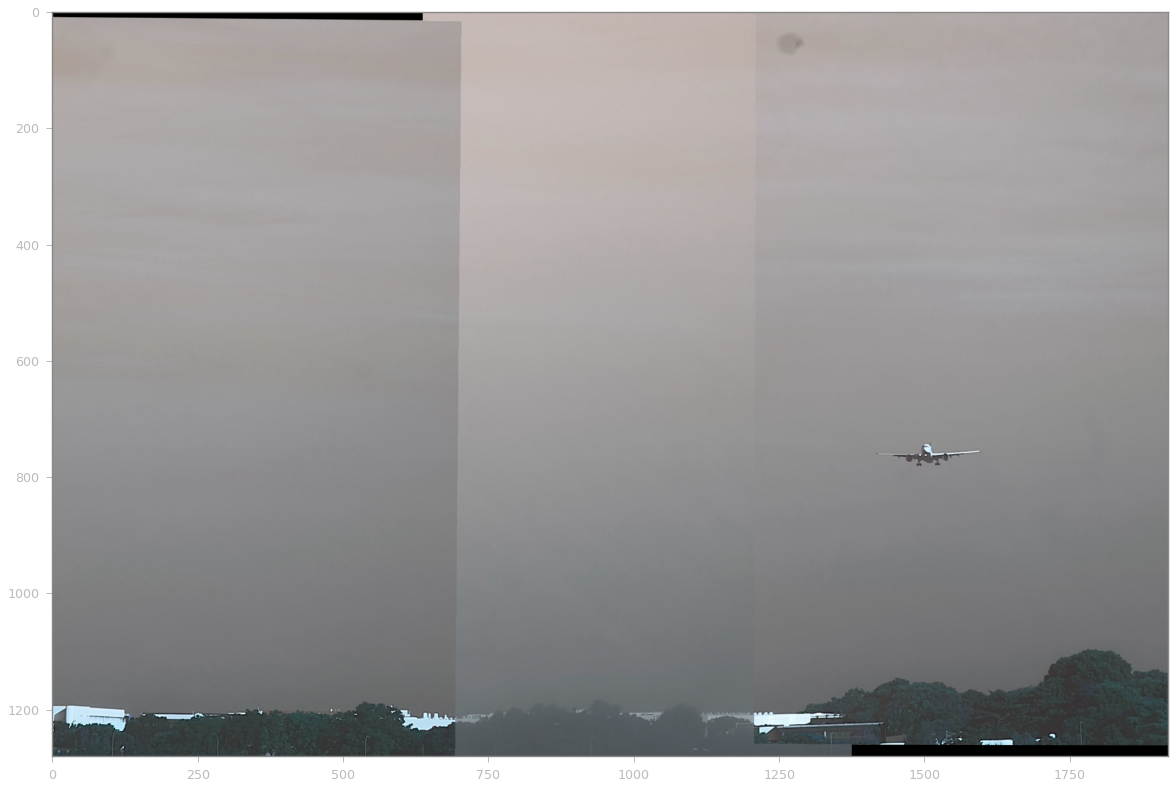

In [99]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
canvas = np.zeros((1946, 2869, 3)).astype(np.uint8)

im2 = cv2.resize(img2, (1055, 1876))
im2 = rotate_image(im2, -0.51)
canvas[51:51+im2.shape[0], 0:0+im2.shape[1], :] = im2

im0 = cv2.resize(img0, (1058, 1881))
im0 = rotate_image(im0, -0.14)
canvas[0:0+im0.shape[0], 1805:1805+im0.shape[1], :] = im0

ff = canvas[26:26+img1.shape[0], 973:973+img1.shape[1], :] == 0
ff = expand(ff, 2)
canvas[26:26+img1.shape[0], 973:973+img1.shape[1], :][ff] = img1[ff]

canvas = canvas[39:-35, 40:-20]
canvas = cv2.resize(canvas, (1920, 1280))

ax.imshow(canvas)